<a href="https://colab.research.google.com/github/Sujan-Sawant/Zee-Recommender-System/blob/main/ZEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = "#FFFF21">**Business Problem:**
- **Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience**

# <font color = "#FFFF21">**Data Dictionary:**

we have 3 files to work with
 - Movies
 - Ratings
 - Users

1. RATINGS FILE DESCRIPTION

- UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040

- MovieIDs range between 1 and 3952

- Ratings are made on a 5-star scale (whole-star ratings only)

- Timestamp is represented in seconds

=========================================================================


2. USERS FILE DESCRIPTION


UserID::Gender::Age::Occupation::Zip-code
- UserIDs range between 1 and 6040

- Gender is denoted by a "M" for male and "F" for female

- Age is chosen from the following ranges:
 - 1: "Under 18"
 - 18: "18-24"
 - 25: "25-34"
 - 35: "35-44"
 - 45: "45-49"
 - 50: "50-55"
 - 56: "56+"


- Occupation is chosen from the following choices:
 - 0: "other" or not specified
 - 1: "academic/educator"
 - 2: "artist"
 - 3: "clerical/admin"
 - 4: "college/grad student"
 - 5: "customer service"
 - 6: "doctor/health care"
 - 7: "executive/managerial"
 - 8: "farmer"
 - 9: "homemaker"
 - 10: "K-12 student"
 - 11: "lawyer"
 - 12: "programmer"
 - 13: "retired"
 - 14: "sales/marketing"
 - 15: "scientist"
 - 16: "self-employed"
 - 17: "technician/engineer"
 - 18: "tradesman/craftsman"
 - 19: "unemployed"
 - 20: "writer"

=========================================================================


3. **MOVIES FILE DESCRIPTION**

Movie information is in the file "movies.dat" and is in the following format:

- MovieID::Title::Genres
- MovieIDs range between 1 and 3952
- Titles are identical to titles provided by the IMDB (including year of release)
- Genres are pipe-separated and are selected from the following genres:
 - Action
 - Adventure
 - Animation
 - Children's
 - Comedy
 - Crime

 - Documentary

 - Drama

 - Fantasy

 - Film-Noir

 - Horror

 - Musical

 - Mystery

 - Romance

 - Sci-Fi

 - Thriller

 - War

 - Western

## CONCEPTS USED:
 - Recommender Engine

- Collaborative Filtering (Item-based & User-based Approach)

- Pearson Correlation

- Nearest Neighbors using Cosine Similarity

- Matrix Factorization

# Downloading data files

In [4]:
! gdown 1nL1wu7AfzZdh5MlQ0iVBGAYgx8NAb_2s
! gdown 1fXhKOEvlm7RzEBg9FaQs8Nlj0n682zUq
! gdown 1VZ5k88QZV73sKnZy6-cWpSbWCfzpITFB

Downloading...
From: https://drive.google.com/uc?id=1nL1wu7AfzZdh5MlQ0iVBGAYgx8NAb_2s
To: /content/zee-movies (1).dat
100% 171k/171k [00:00<00:00, 66.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fXhKOEvlm7RzEBg9FaQs8Nlj0n682zUq
To: /content/zee-ratings (3).dat
100% 24.6M/24.6M [00:00<00:00, 43.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VZ5k88QZV73sKnZy6-cWpSbWCfzpITFB
To: /content/zee-users (1).dat
100% 134k/134k [00:00<00:00, 50.3MB/s]


# Importing Required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")


# Reading the data files

In [6]:
movies = pd.read_fwf("/content/zee-movies (1).dat", encoding='ISO-8859-1')
ratings = pd.read_fwf("/content/zee-ratings (3).dat", encoding='ISO-8859-1')
users = pd.read_fwf("/content/zee-users (1).dat", encoding='ISO-8859-1')


In [7]:
movies.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [8]:
ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [9]:
users.head()

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


# Data Formatting

In [10]:
movies.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [11]:
movies.drop(columns = ["Unnamed: 1","Unnamed: 2"],axis = 1,inplace = True)

In [12]:
delimeter = "::"
movies = movies["Movie ID::Title::Genres"].str.split(delimeter, expand=True) # here expand=True will create a dataframe instead of a series
movies.columns = ["Movie ID","Title","Genres"]

In [13]:
movies.rename(columns={'Movie ID':'MovieID'}, inplace=True)

In [14]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [16]:
ratings = ratings["UserID::MovieID::Rating::Timestamp"].str.split(delimeter,expand=True)
ratings.columns = ["UserID","MovieID","Rating","Timestamp"]

In [17]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [18]:
users.head()

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


In [19]:
users = users["UserID::Gender::Age::Occupation::Zip-code"].str.split(delimeter,expand=True)
users.columns = ["UserID","Gender","Age","Occupation","Zip-code"]

In [20]:
users.replace( {"Age" : {
    "1": "Under 18",
    "18": "18-24",
    "25": "25-34",
    "35": "35-44",
    "45": "45-49",
    "50" : "50-55",
    "56" : "56 Above"}},inplace=True)



In [21]:
users.replace({"Occupation": {
    "0": "other",
    "1": "academic/educator",
    "2": "artist",
    "3": "clerical/admin",
    "4": "college/grad student",
    "5": "customer service",
    "6": "doctor/health care",
    "7": "executive/managerial",
    "8": "farmer",
    "9": "homemaker",
    "10": "k-12 student",
    "11": "lawyer",
    "12": "programmer",
    "13": "retired",
    "14": "sales/marketing",
    "15": "scientist",
    "16": "self-employed",
    "17": "technician/engineer",
    "18": "tradesman/craftsman",
    "19": "unemployed",
    "20": "writer"
}}, inplace=True)


In [22]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,k-12 student,48067
1,2,M,56 Above,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


# Merging the dataframes -


In [23]:
df1 = pd.merge(movies,ratings, on = "MovieID",how = "inner")
df1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [24]:
df2 = pd.merge(df1, users, on="UserID",how="inner")
df2.head()


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,Under 18,k-12 student,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50-55,homemaker,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25-34,programmer,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25-34,technician/engineer,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35-44,academic/educator,95370


In [25]:
data = df2.copy(deep=True)
data.head(10)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,Under 18,k-12 student,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50-55,homemaker,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25-34,programmer,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25-34,technician/engineer,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35-44,academic/educator,95370
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768,F,18-24,clerical/admin,95825
6,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994,M,Under 18,k-12 student,48073
7,1,Toy Story (1995),Animation|Children's|Comedy,21,3,978139347,M,18-24,self-employed,99353
8,1,Toy Story (1995),Animation|Children's|Comedy,23,4,978463614,M,35-44,other,90049
9,1,Toy Story (1995),Animation|Children's|Comedy,26,3,978130703,M,25-34,executive/managerial,23112


In [23]:
data.sample(10)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
75003,288,Natural Born Killers (1994),Action|Thriller,2419,3,974247848,M,25-34,other,06096
506271,1885,"Opposite of Sex, The (1998)",Comedy|Drama,5749,3,962843557,M,25-34,artist,94117
371632,1288,This Is Spinal Tap (1984),Comedy|Drama|Musical,1796,5,974699020,M,50-55,lawyer,20852
736037,2719,"Haunting, The (1999)",Horror|Thriller,5826,2,957897859,M,18-24,college/grad student,60201
200647,800,Lone Star (1996),Drama|Mystery,3690,2,966308445,M,18-24,other,63116
848817,3174,Man on the Moon (1999),Comedy|Drama,4432,2,965099998,M,25-34,programmer,21045
753791,2791,Airplane! (1980),Comedy,3621,4,966714928,M,18-24,college/grad student,33023
49550,171,Jeffrey (1995),Comedy,3843,4,965908939,F,Under 18,k-12 student,32043
576503,2102,Steamboat Willie (1940),Animation|Children's|Comedy|Musical,1988,4,976483440,F,25-34,academic/educator,85224
366132,1278,Young Frankenstein (1974),Comedy|Horror,2035,5,974671397,F,18-24,other,45212


# Performing EDA

In [24]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).
data.shape

(1000209, 10)

In [25]:
# Retrieving the column labels (names) of a DataFrame .
data.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [26]:
# Retrieving statistics of the numerical columns in a DataFrame.
data.describe().T

,count,unique,top,freq
MovieID,1000209,3706,2858,3428
Title,1000209,3706,American Beauty (1999),3428
Genres,996144,358,Comedy,116691
UserID,1000209,6040,4169,2314
Rating,1000209,5,4,348971
Timestamp,1000209,458455,975528402,30
Gender,1000209,2,M,753769
Age,1000209,7,25-34,395556
Occupation,1000209,21,college/grad student,131032
Zip-code,1000209,3439,94110,3802


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  object
 1   Title       1000209 non-null  object
 2   Genres      996144 non-null   object
 3   UserID      1000209 non-null  object
 4   Rating      1000209 non-null  object
 5   Timestamp   1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  object
 8   Occupation  1000209 non-null  object
 9   Zip-code    1000209 non-null  object
dtypes: object(10)
memory usage: 76.3+ MB


In [28]:
# Display the number of missing values (NaN) in each column of the DataFrame
data.isnull().sum()

,0
MovieID,0
Title,0
Genres,4065
UserID,0
Rating,0
Timestamp,0
Gender,0
Age,0
Occupation,0
Zip-code,0


# Feature Engineering

In [29]:
data["Rating"].unique()

array(['5', '4', '3', '2', '1'], dtype=object)

In [30]:
data["Datetime"] = pd.to_datetime(data["Timestamp"],unit="s")


In [31]:
data.sample(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Datetime
843628,3155,Anna and the King (1999),Drama|Romance,2427,3,990799216,F,25-34,sales/marketing,94010,2001-05-25 14:00:16
809444,3006,"Insider, The (1999)",Drama,5503,4,960076562,F,25-34,homemaker,55409,2000-06-03 23:56:02
383770,1307,When Harry Met Sally... (1989),Comedy|Romance,4318,5,965339838,M,25-34,customer service,02891,2000-08-03 21:57:18
801535,2987,Who Framed Roger Rabbit? (1988),Adventure|Animation|Film-Noir,1632,3,974718513,M,25-34,self-employed,94120,2000-11-20 11:08:33
752914,2791,Airplane! (1980),Comedy,772,4,975440002,M,18-24,programmer,89118,2000-11-28 19:33:22


In [32]:
data["ReleaseYear"] = data["Title"].str.rsplit(' ').str[-1]
data["ReleaseYear"] = data["ReleaseYear"].str.lstrip("(").str.rstrip(")")


In [33]:
data.sample(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Datetime,ReleaseYear
384433,1320,Alien³ (1992),Action|Horror|Sci-Fi|Thriller,438,3,976248037,M,18-24,lawyer,53705,2000-12-08 04:00:37,1992
284914,1136,Monty Python and the Holy Grail (1974),Comedy,2919,5,975446935,M,18-24,technician/engineer,88076,2000-11-28 21:28:55,1974
703035,2616,Dick Tracy (1990),Action|Crime,4655,3,963899279,F,25-34,academic/educator,92037,2000-07-18 05:47:59,1990
957457,3702,Mad Max (1979),Action|Sci-Fi,1216,4,974841105,M,25-34,artist,90292,2000-11-21 21:11:45,1979
536699,1987,Prom Night (1980),Horror,1785,2,974699686,M,18-24,college/grad student,04901,2000-11-20 05:54:46,1980


In [34]:
data["ReleaseYear"].unique()

array(['1995', '1994', '1996', 'the', '1976', '1993', '1992', '1988',
       '1967', '1964):', '1977', 'B', '1965', '1982', '1962', '1990',
       '1991', '1989', '1937', '1940', '1969', '1981', '1973', '1970',
       '1960', '1955', '1956', '1959', '1968', '1980', '1975', '1995):',
       '1948', '1943', 'Bo', '1950', '1987', '1997', 'Arta', '1974',
       '1958', '1972', '1998', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1963', '1942', '1941', '1964', '1953', '1939',
       '1947', '1946', '1945', '1938', '1935', '1936', '1926', '1949',
       '1932', '1930', '1971', '1979', '1986', '1966', '1978', '1985',
       '1983', '1984', '1933', '1931', '1922', '19', '1927', '1929',
       '195', '1928', '1999', "d'A", 'Polar', '1925', '1981):', '1919',
       '', '1923', '2000', '1', '1920', '1921', 'prendront', '1989):'],
      dtype=object)

In [35]:
data["ReleaseYear"].replace(["1964):", "1981):", "1989):", "1995):"],["1964", "1981", "1989", "1995"], inplace=True)

In [36]:
idx      = data[(data["ReleaseYear"] == "the") |
                (data["ReleaseYear"] == "B") |
                (data["ReleaseYear"] == "Bo") |
                (data["ReleaseYear"] == "Arta") |
                (data["ReleaseYear"] == "19") |
                (data["ReleaseYear"] == "195") |
                (data["ReleaseYear"] == "d'A") |
                (data["ReleaseYear"] == "Polar") |
                (data["ReleaseYear"] == "") |
                (data["ReleaseYear"] == "1") |
                (data["ReleaseYear"] == "prendront")].index

data.drop(index=idx, inplace=True)


In [37]:
data.head(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Datetime,ReleaseYear
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,Under 18,k-12 student,48067,2001-01-06 23:37:48,1995
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50-55,homemaker,55117,2000-12-31 04:30:08,1995
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25-34,programmer,11413,2000-12-31 03:31:36,1995
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25-34,technician/engineer,61614,2000-12-31 01:25:52,1995
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35-44,academic/educator,95370,2000-12-31 01:34:34,1995


In [38]:
data["Title"] = data["Title"].str.rsplit(" (", n=1).str[0]


In [39]:
data.sample(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Datetime,ReleaseYear
813178,3032,"Omega Man, The",Sci-Fi,1861,3,974698798,M,50-55,self-employed,92129,2000-11-20 05:39:58,1971
254394,1037,"Lawnmower Man, The",Action|Sci-Fi|Thriller,1851,2,998443219,M,25-34,unemployed,59602,2001-08-22 01:20:19,1992
630663,2335,"Waterboy, The",Comedy,5954,1,957654413,M,45-49,lawyer,70802,2000-05-06 23:06:53,1998
480433,1711,Midnight in the Garden of Good and Evil,Comedy|Crime|Dram,216,4,976866849,M,45-49,retired,52761,2000-12-15 07:54:09,1997
973768,3763,F/X,Action|Crime|Thriller,4373,5,965179841,M,50-55,programmer,32920,2000-08-02 01:30:41,1986


In [40]:
data["ReleaseYear"] = data["ReleaseYear"].astype(int)
bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000]
labels = ["20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s"]
data["ReleaseDecade"] = pd.cut(data["ReleaseYear"], bins=bins, labels=labels)


In [41]:
data.sample(10)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Datetime,ReleaseYear,ReleaseDecade
683059,2527,Westworld,Action|Sci-Fi|Thriller|Western,710,4,975741215,M,25-34,writer,85207,2000-12-02 07:13:35,1973,70s
312821,1209,Once Upon a Time in the West,Western,4894,5,962733651,M,35-44,executive/managerial,14607,2000-07-04 18:00:51,1969,60s
989441,3868,"Naked Gun: From the Files of Police Squad!, The",Comedy,3590,4,966657683,F,18-24,scientist,02115,2000-08-19 04:01:23,1988,80s
939502,3614,Honeymoon in Vegas,Comedy|Romance,1962,2,975363130,F,18-24,academic/educator,60914,2000-11-27 22:12:10,1992,90s
325136,1221,"Godfather: Part II, The",Action|Crime|Drama,2841,3,972587994,M,50-55,programmer,98056,2000-10-26 19:19:54,1974,70s
872067,3267,"Mariachi, El",Action|Thriller,4508,4,964981867,M,25-34,writer,15701,2000-07-30 18:31:07,1992,90s
225189,919,"Wizard of Oz, The",Adventure|Children's|Drama|Musical,4360,3,965187387,F,25-34,homemaker,98001,2000-08-02 03:36:27,1939,30s
703194,2617,"Mummy, The",Action|Adventure|Horror|Thriller,210,5,977100233,F,Under 18,k-12 student,25801,2000-12-18 00:43:53,1999,90s
818061,3049,How I Won the War,Comedy|War,4207,3,965321725,M,35-44,academic/educator,90731,2000-08-03 16:55:25,1967,60s
691637,2567,EDtv,Comedy,2840,3,972571013,M,25-34,other,60660,2000-10-26 14:36:53,1999,90s


In [44]:
duplicate_rows = data[data.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])


No. of duplicate rows:  0


## **Visualizing the data with respect to different categories to get a better understanding of the underlying distribution**
Lets focus on key categories like:
1. **Gender**
2. **Age**
3. **Occupation**
4. **Movie Ratings**
5. **Release Year**

**1. Gender Distribution**

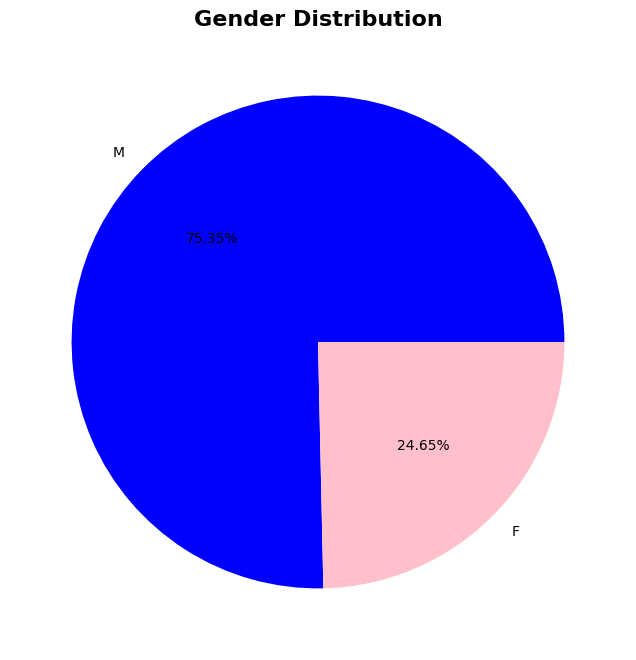

In [50]:
plt.figure(figsize=(10,8))
plt.pie(data["Gender"].value_counts(),
        labels=data["Gender"].value_counts().index,
        autopct="%0.2f%%",
        colors=["Blue","Pink"])
plt.title("Gender Distribution",fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

**2. Distribution by Age**

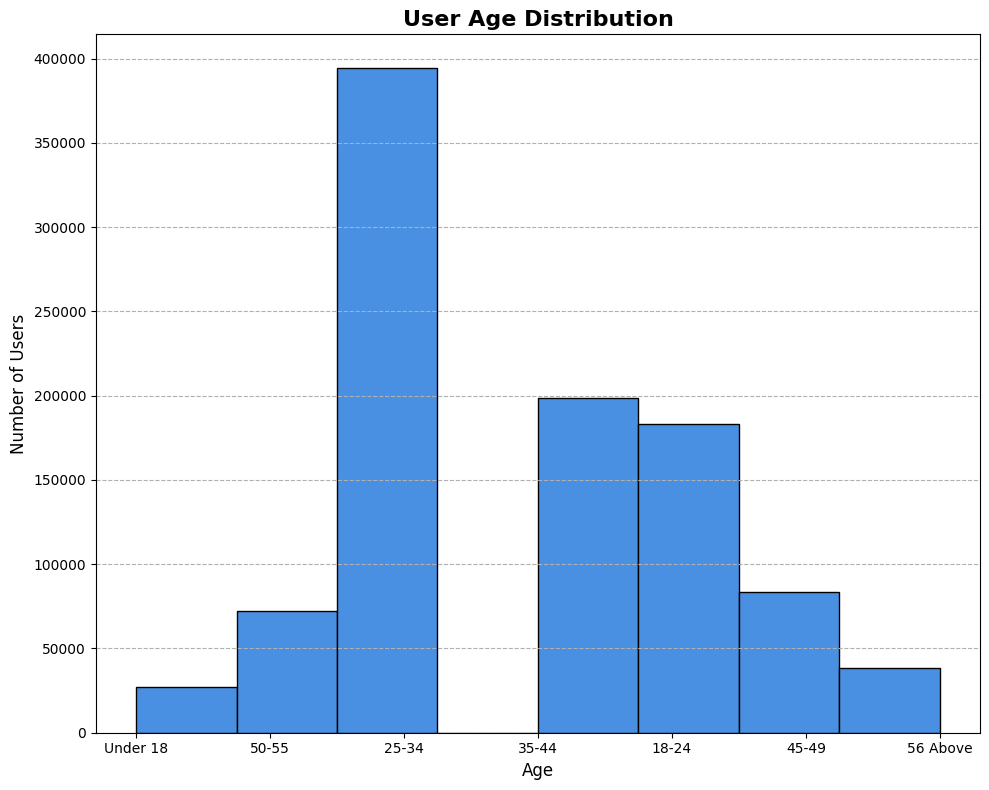

In [57]:
plt.figure(figsize=(10, 8))
plt.hist(data["Age"], bins=8, color="#4a90e2", edgecolor="black")

plt.title("User Age Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)

plt.grid(axis="y", linestyle="--")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


**3. Distribution by Occupation**

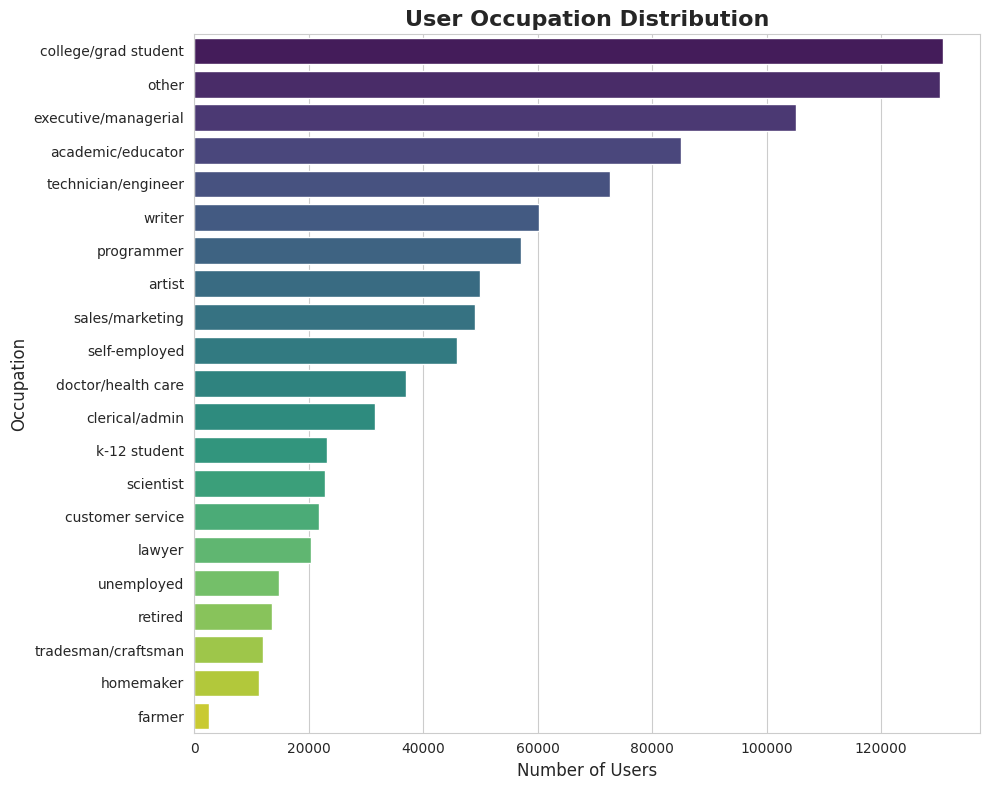

In [60]:
plt.figure(figsize=(10, 8))

# Sort occupations by count
sorted_occupations = data["Occupation"].value_counts().index

sns.countplot(
    y="Occupation",
    data=data,
    order=sorted_occupations,
    palette="viridis"
)

plt.title("User Occupation Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("Occupation", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


**4.** **Distribution of Movie Ratings**

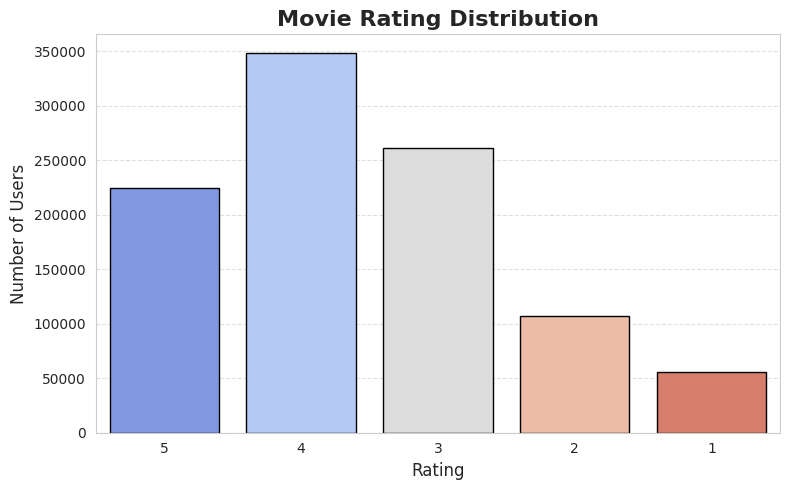

In [61]:
plt.figure(figsize=(8, 5))

sns.countplot(
    x="Rating",
    data=data,
    palette="coolwarm",
    edgecolor="black"
)

plt.title("Movie Rating Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


**5.Distribution by Release Year**

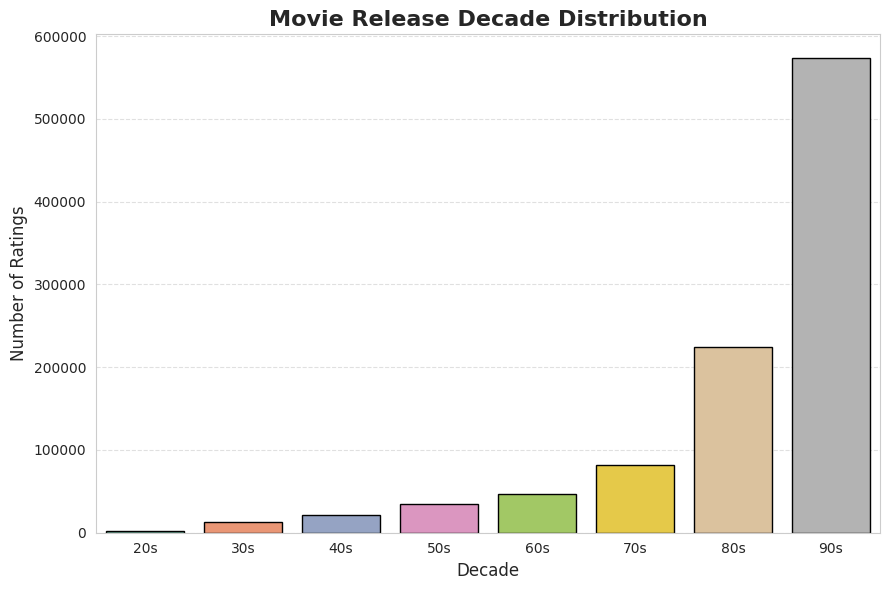

In [63]:
plt.figure(figsize=(9, 6))

# Count plot by release decade
sns.countplot(
    x="ReleaseDecade",
    data=data,
    palette="Set2",
    order=["20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s"],
    edgecolor="black"
)

plt.title("Movie Release Decade Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


## Grouping the data

### **Average rating**

In [67]:
data["Rating"] = pd.to_numeric(data["Rating"], errors="coerce")
data.groupby("Title")["Rating"].mean().sort_values(ascending=False).head(10)

,Rating
Title,
Schlafes Bruder (Brother of Sleep),5.0
Smashing Time,5.0
Song of Freedom,5.0
Follow the Bitch,5.0
"Baby, The",5.0
"Gate of Heavenly Peace, The",5.0
Bittersweet Motel,5.0
Ulysses (Ulisse),5.0
One Little Indian,5.0


### **No. of ratings**

In [69]:
data.groupby("Title")["Rating"].count().sort_values(ascending=False).head(10)

,Rating
Title,
American Beauty,3428
Star Wars: Episode IV - A New Hope,2991
Star Wars: Episode V - The Empire Strikes Back,2990
Star Wars: Episode VI - Return of the Jedi,2883
Jurassic Park,2672
Saving Private Ryan,2653
Terminator 2: Judgment Day,2649
"Matrix, The",2590
Back to the Future,2583


# **Pivot Table - Creating a User-Item Rating Matrix**

In [72]:
# Pivot table: rows = movie titles, columns = user IDs, values = ratings
movie_user_matrix = pd.pivot_table(data,index="UserID", columns="Title", values="Rating")
movie_user_matrix.head(10)

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Imputing 'NaN' values with Zero rating

In [74]:
movie_user_matrix.fillna(0, inplace=True)
movie_user_matrix.shape


(6040, 3650)

# **Pearson Correlation :**
- **Correlation is a measure that tells how closely two variables move in the same or opposite direction.**
- **A positive value indicates that they move in the same direction (i.e. if one increases other increases)**
- **where as a negative value indicates the opposite.**
- **The most popular correlation measure for numerical data is Pearson's Correlation. This measures the degree of linear relationship between two numeric variables and lies between -1 to +1. It is represented by 'r'.**
 - **r=1 means perfect positive correlation**
 - **r=-1 means perfect negative correlation**
 - **r=0 means no linear correlation.**

In [80]:
movie_name = input("Enter a movie name: ")
movie_rating = movie_user_matrix[movie_name]


Enter a movie name: 12 Angry Men


In [81]:
similar_movies = movie_user_matrix.corrwith(movie_rating)
sim_df = pd.DataFrame(similar_movies, columns=['Correlation'])
sim_df.sort_values('Correlation', ascending=False, inplace=True)


In [86]:
sim_df.iloc[1:6]


,Correlation
Title,
To Kill a Mockingbird,0.316778
Amadeus,0.307509
It's a Wonderful Life,0.300912
Citizen Kane,0.294742
"Bridge on the River Kwai, The",0.293340


## **Define a function that recommends movies similar to a given title based on user ratings.**

In [90]:
def get_similar_movie(movie_name):

  if movie_name not in movie_user_matrix.columns:
        print(f"'{movie_name}' not found in the movie matrix.")
        return pd.DataFrame()
  else:
    # Calculate correlation of all movies with the target movie

    movie_rating = movie_user_matrix[movie_name]
    similar_movies = movie_user_matrix.corrwith(movie_rating)

    # Create a DataFrame to store results
    sim_df = pd.DataFrame(similar_movies, columns=['Correlation'])
    return sim_df.sort_values('Correlation', ascending=False)[1:6]

In [98]:
get_similar_movie("Young Sherlock Holmes")

,Correlation
Title,
Indiana Jones and the Temple of Doom,0.370317
Willow,0.353126
Batman,0.351804
Superman II,0.346614
Romancing the Stone,0.343151


## **Cosine Similarity:**
- **Cosine similarity is a measure of similarity between two sequences of numbers.**
- **Cosine similarity is defined as the cosine of the angle between them, i.e. the dot product of the vectors divided by the product of their lengths.**
- **The cosine similarity always belongs to the interval [-1,1]. For example, two proportional vectors have a cosine similarity of 1, two orthogonal vectors have a similarity of 0, and two opposite vectors have a similarity of -1.**


In [99]:
# Cosine Similarity
item_sim = cosine_similarity(movie_user_matrix.T)
item_sim


array([[1.        , 0.07235746, 0.03701053, ..., 0.        , 0.12024178,
        0.02700277],
       [0.07235746, 1.        , 0.11528952, ..., 0.        , 0.        ,
        0.07780705],
       [0.03701053, 0.11528952, 1.        , ..., 0.        , 0.04752635,
        0.0632837 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04564448],
       [0.12024178, 0.        , 0.04752635, ..., 0.        , 1.        ,
        0.04433508],
       [0.02700277, 0.07780705, 0.0632837 , ..., 0.04564448, 0.04433508,
        1.        ]])

## **Item similarity matrix**

In [100]:
item_sim_mat = pd.DataFrame(item_sim, index=movie_user_matrix.columns, columns=movie_user_matrix.columns)
item_sim_mat.head()

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck",1.000000,0.072357,0.037011,0.079291,0.060838,0.00000,0.058619,0.189843,0.094785,0.058418,...,0.038725,0.076474,0.000000,0.044074,0.0,0.045280,0.039395,0.000000,0.120242,0.027003
'Night Mother,0.072357,1.000000,0.115290,0.115545,0.159526,0.00000,0.076798,0.137135,0.111413,0.046135,...,0.053010,0.087828,0.063758,0.135962,0.0,0.091150,0.074787,0.000000,0.000000,0.077807
'Til There Was You,0.037011,0.115290,1.000000,0.098756,0.066301,0.08025,0.127895,0.128523,0.079115,0.066598,...,0.029200,0.062893,0.000000,0.079187,0.0,0.022594,0.079261,0.000000,0.047526,0.063284
"'burbs, The",0.079291,0.115545,0.098756,1.000000,0.143620,0.00000,0.192191,0.250140,0.170719,0.197808,...,0.113386,0.207897,0.019962,0.138064,0.0,0.055704,0.161174,0.000000,0.033567,0.110525
...And Justice for All,0.060838,0.159526,0.066301,0.143620,1.000000,0.00000,0.075093,0.178928,0.205486,0.122431,...,0.089998,0.153006,0.067009,0.109029,0.0,0.086080,0.110867,0.074317,0.000000,0.111040


## **User similarity matrix:**

In [101]:
user_sim = cosine_similarity(movie_user_matrix)

user_sim_mat = pd.DataFrame(user_sim, index=movie_user_matrix.index, columns=movie_user_matrix.index)
user_sim_mat.head()


UserID,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.255319,0.123967,0.207800,0.139317,0.110320,0.121384,0.180073,0.103896,0.052816,...,0.079367,0.038048,0.032136,0.067631,0.070052,0.035731,0.170184,0.159267,0.119356,0.122391
10,0.255319,1.000000,0.259645,0.280479,0.158703,0.112917,0.141985,0.432171,0.194915,0.102487,...,0.154412,0.186234,0.083739,0.125894,0.118558,0.146552,0.304806,0.165700,0.133327,0.248450
100,0.123967,0.259645,1.000000,0.306067,0.075736,0.110450,0.358686,0.237292,0.172872,0.099147,...,0.098235,0.097953,0.065152,0.178664,0.271311,0.033754,0.344290,0.204302,0.113522,0.306937
1000,0.207800,0.280479,0.306067,1.000000,0.099117,0.047677,0.201722,0.355619,0.325966,0.130702,...,0.170100,0.076779,0.000000,0.200343,0.380741,0.044404,0.330748,0.172803,0.098456,0.250564
1001,0.139317,0.158703,0.075736,0.099117,1.000000,0.164854,0.053887,0.150069,0.138602,0.134710,...,0.146270,0.026891,0.097011,0.119609,0.092234,0.109700,0.222119,0.103255,0.269952,0.178399


# **User-Based Collaborative Filtering**

In [134]:
def user_based_recommend(user_id, top_n=5):

    if user_id not in movie_user_matrix.index:
        return f"User '{user_id}' not found in the movie_user_matrix."

    # Get similar users
    similar_users = user_sim_mat[user_id].sort_values(ascending=False)[1:top_n+1]
    user_ratings = movie_user_matrix.loc[user_id]
    recommendations = pd.Series(dtype=float)

    # Weighted sum of ratings from similar users
    for sim_user, score in similar_users.items():
        sim_ratings = movie_user_matrix.loc[sim_user]
        for movie in movie_user_matrix.columns:
            if user_ratings.get(movie, 0) == 0 and sim_ratings.get(movie, 0) > 0:
                recommendations[movie] = recommendations.get(movie, 0) + score * sim_ratings[movie]

    return recommendations.sort_values(ascending=False).head(top_n)


In [135]:
print("User-Based Recommendations for User:")
print(user_based_recommend("12"))


User-Based Recommendations for User:
American Beauty                                   7.593150
2001: A Space Odyssey                             4.932651
Star Wars: Episode V - The Empire Strikes Back    4.811101
Midnight Cowboy                                   4.718197
Life Is Beautiful (La Vita è bella)               4.170335
dtype: float64


# **Item-Based Collaborative Filtering**

In [138]:
def item_based_recommend(user_id, top_n=5):

    if user_id not in movie_user_matrix.index:
        return f"User '{user_id}' not found in the movie_user_matrix."

    user_ratings = movie_user_matrix.loc[user_id]
    recommendations = pd.Series(dtype=float)

    for movie, rating in user_ratings.items():
        if rating > 0 and movie in item_sim_mat.columns:
            similar_items = item_sim_mat[movie].sort_values(ascending=False)[1:]
            for item, score in similar_items.items():
                if user_ratings.get(item, 0) == 0:
                    recommendations[item] = recommendations.get(item, 0) + score * rating

    return recommendations.sort_values(ascending=False).head(top_n)


In [139]:
print("Item-Based Recommendations for User:")
print(item_based_recommend("120"))


Item-Based Recommendations for User:
L.A. Confidential     97.538833
Back to the Future    94.192842
Groundhog Day         92.725024
Wizard of Oz, The     92.493028
Terminator, The       92.206945
dtype: float64


# **Matrix Factorization:**

In [149]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505205 sha256=a8c6d711abc2ae28a1f53788b4980d348b79fd1d526ea0c0e3602551dd738d93
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [152]:
!pip install numpy==1.23.5
!pip install scikit-surprise --no-binary :all:


In [1]:
!pip install numpy<2 --force-reinstall


/bin/bash: line 1: 2: No such file or directory


In [ ]:
import os
os.kill(os.getpid(), 9)  # forces runtime restart


In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split as surprise_split

In [27]:
reader = Reader(rating_scale=(0.5, 5.0))
df = Dataset.load_from_df(data[["UserID", "Title", "Rating"]], reader)
trainset, testset = surprise_split(df, test_size=0.2)

algo = SVD(n_factors=4)
algo.fit(trainset)
predictions = algo.test(testset)

In [30]:
print(f'{"User ID":<10} | {"Movie":<40} | {"Actual":<6} | {"Predicted":<9}')
print('-' * 75)

# Print result for only first 50 predictions
for i, pred in enumerate(predictions[:50]):
    print(f'{pred.uid:<10} | {pred.iid:<40} | {pred.r_ui:<6} | {pred.est:<9.2f}')


User ID    | Movie                                    | Actual | Predicted
---------------------------------------------------------------------------
3096       | Gigi (1958)                              | 4.0    | 4.36     
2085       | Cops and Robbersons (1994)               | 3.0    | 2.91     
387        | Young Frankenstein (1974)                | 5.0    | 4.05     
692        | Twin Peaks: Fire Walk with Me (1992)     | 3.0    | 3.39     
731        | Rules of Engagement (2000)               | 4.0    | 3.58     
3756       | Cool Hand Luke (1967)                    | 4.0    | 4.20     
3453       | Few Good Men, A (1992)                   | 4.0    | 3.69     
1415       | American Graffiti (1973)                 | 3.0    | 3.83     
3191       | Mars Attacks! (1996)                     | 4.0    | 2.44     
2199       | Gods and Monsters (1998)                 | 4.0    | 4.13     
4458       | American Werewolf in London, An (1981)   | 4.0    | 3.57     
4790       | House of th

### **Evaluation**

In [31]:
# Print Overall Result
from surprise import accuracy

rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)


RMSE: 0.8803
MAE:  0.6938


In [32]:
from sklearn.metrics import mean_absolute_percentage_error

# Extract true and predicted ratings from the Surprise predictions
y_true = [pred.r_ui for pred in predictions]
y_pred = [pred.est for pred in predictions]

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"MAPE: {mape:.4f}")


MAPE: 0.2691


# Embeding for user-user and item-item similarity remaining

# **Nearest Neighbors**

In [140]:
csr_mat = sparse.csr_matrix(movie_user_matrix.T.values)
csr_mat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 994515 stored elements and shape (3650, 6040)>

- **A sparse matrix or sparse array is a matrix in which most of the elements are zero.**
- **A compressed sparse row (CSR) matrix 'M' is represented by three (onedimensional) arrays, that respectively contain nonzero values, the extents of rows,and column indices.**
- **The CSR format stores a sparse m × n matrix M in row form using three (one-dimensional) arrays (V, COL_INDEX, ROW_INDEX).**
**For example -**
**Dense matrix representation:**

[[1 0 0 0 0 0]

[0 0 2 0 0 1]

[0 0 0 2 0 0]]


**Sparse 'row' matrix:**

(0, 0) 1

(1, 2) 2

(1, 5) 1

(2, 3) 2


### **Fitting the model with 'cosine similarity' as the distance metric and 5 (five) as the no. of nearest neighbors**


In [141]:
knn = NearestNeighbors(n_neighbors=5, metric='cosine', n_jobs=-1)
knn.fit(csr_mat)


NearestNeighbors(metric='cosine', n_jobs=-1)

#### Lets reccommend using knn

In [142]:
movie_name = input("Enter a movie name: ")
movie_index = movie_user_matrix.columns.get_loc(movie_name)

Enter a movie name: 12 Angry Men


In [148]:
# Input movie name from user
movie_name = input("Enter a movie name: ")

# Check if movie exists
if movie_name in movie_user_matrix.columns:
    movie_index = movie_user_matrix.columns.get_loc(movie_name)

    # Get nearest neighbors
    distances, indices = knn.kneighbors(csr_mat[movie_index], n_neighbors=6)

    # Display recommendations
    print(f"\nRecommendations for the movie: {movie_name}\n")
    for i in range(1, len(distances.flatten())):
        print(f"{i}: {movie_user_matrix.columns[indices.flatten()[i]]}, with distance of {distances.flatten()[i]:.4f}")
else:
    print(f"'{movie_name}' not found in the dataset.")

Enter a movie name: Westworld

Recommendations for the movie: Westworld

1: Logan's Run, with distance of 0.4625
2: Escape from New York, with distance of 0.4837
3: Planet of the Apes, with distance of 0.4847
4: War of the Worlds, The, with distance of 0.4966
5: Robocop, with distance of 0.5055


## **Thank you**

**=========================================================================**

